In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sys
sys.path.append('/Users/minghongsun/Desktop/model/')
from my_functions import *
import math



In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Hiragino Sans GB'
plt.rcParams['axes.unicode_minus'] = False


In [3]:
df = pd.read_excel('/Users/minghongsun/Desktop/model/09-18data/各种工业表.xlsx',sheet_name = '大分類製造業')

In [4]:
df2 = pd.read_excel('制造业大分类_washed_data.xlsx',index_col=0)

In [5]:
data = pd.merge(left = df,right = df2,on = 'year',how = 'outer')

In [6]:
data.drop(columns = '学历年龄',inplace=True)

In [7]:
len(data.columns)

14

In [8]:
data

,year,出荷额,中间投入,資本サービス投入指数,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),education,sex
0,2009,233860164,134270200,1.031655,22.8,2.3,167,31,219.9,181.2,267.1,1051,9,1
1,2009,233860164,134270200,1.031655,27.5,4.8,164,16,241.6,212.4,483.4,1252,9,1
2,2009,233860164,134270200,1.031655,32.6,7.2,166,16,256.3,225.8,530.6,1502,9,1
3,2009,233860164,134270200,1.031655,37.3,10.7,166,16,288.9,255.1,675.2,2049,9,1
4,2009,233860164,134270200,1.031655,42.7,13.9,165,14,298.5,269.9,748.9,1793,9,1
5,2009,233860164,134270200,1.031655,47.5,17.5,166,14,318.9,289.3,833.5,1724,9,1
6,2009,233860164,134270200,1.031655,52.9,25.8,165,10,344.9,315.7,1081.1,3528,9,1
7,2009,233860164,134270200,1.031655,57.8,29.1,161,10,360.0,331.4,1178.3,7933,9,1
8,2009,233860164,134270200,1.031655,22.5,3.3,163,15,216.7,189.0,587.5,20894,12,1
9,2009,233860164,134270200,1.031655,27.7,5.9,163,16,250.7,219.1,695.8,25745,12,1


In [9]:
data['ckb'] = data['資本サービス投入指数']

In [10]:
data['総労働時間'] = data['所定内実労働時間数'] + data['超過実労働時間数']

In [11]:
data['労働者給与'] = data['きまって支給する現金給与額(千円)'] *12 +data['年間賞与その他特別給与額(千円)']

In [12]:
data['勤続年数2乘'] = np.square(data['勤続年数'])

In [13]:
data = data.astype(np.float64)

In [14]:
data['自然対数実際中间投入'] = np.log(data['中间投入'])

In [15]:
data['自然対数出荷額'] = np.log(data['出荷额'])

In [16]:
data['自然対数労働者給与'] = np.log(data['労働者給与'])

In [17]:
hiseiki_rate = [0.31303063861203395,0.31942392909896605,0.3283230713509598,0.3437330928764653,0.35141424991049053,0.35120738636363635,0.35262237762237764,0.3506024096385542,0.3576851695630167]

In [18]:
year = [2009,2010,2012,2013,2014,2015,2016,2017,2018]


In [19]:
df = pd.DataFrame([year,hiseiki_rate],index = ['year','hiseiki']).T
df

,year,hiseiki
0,2009.0,0.313031
1,2010.0,0.319424
2,2012.0,0.328323
3,2013.0,0.343733
4,2014.0,0.351414
5,2015.0,0.351207
6,2016.0,0.352622
7,2017.0,0.350602
8,2018.0,0.357685


In [20]:
data = pd.merge(data,df,on='year')

In [21]:
data

,year,出荷额,中间投入,資本サービス投入指数,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),education,sex,ckb,総労働時間,労働者給与,勤続年数2乘,自然対数実際中间投入,自然対数出荷額,自然対数労働者給与,hiseiki
0,2009.0,233860164.0,134270200.0,1.031655,22.8,2.3,167.0,31.0,219.9,181.2,267.1,1051.0,9.0,1.0,1.031655,198.0,2905.9,5.29,18.715365,19.270234,7.974498,0.313031
1,2009.0,233860164.0,134270200.0,1.031655,27.5,4.8,164.0,16.0,241.6,212.4,483.4,1252.0,9.0,1.0,1.031655,180.0,3382.6,23.04,18.715365,19.270234,8.126400,0.313031
2,2009.0,233860164.0,134270200.0,1.031655,32.6,7.2,166.0,16.0,256.3,225.8,530.6,1502.0,9.0,1.0,1.031655,182.0,3606.2,51.84,18.715365,19.270234,8.190410,0.313031
3,2009.0,233860164.0,134270200.0,1.031655,37.3,10.7,166.0,16.0,288.9,255.1,675.2,2049.0,9.0,1.0,1.031655,182.0,4142.0,114.49,18.715365,19.270234,8.328934,0.313031
4,2009.0,233860164.0,134270200.0,1.031655,42.7,13.9,165.0,14.0,298.5,269.9,748.9,1793.0,9.0,1.0,1.031655,179.0,4330.9,193.21,18.715365,19.270234,8.373531,0.313031
5,2009.0,233860164.0,134270200.0,1.031655,47.5,17.5,166.0,14.0,318.9,289.3,833.5,1724.0,9.0,1.0,1.031655,180.0,4660.3,306.25,18.715365,19.270234,8.446835,0.313031
6,2009.0,233860164.0,134270200.0,1.031655,52.9,25.8,165.0,10.0,344.9,315.7,1081.1,3528.0,9.0,1.0,1.031655,175.0,5219.9,665.64,18.715365,19.270234,8.560234,0.313031
7,2009.0,233860164.0,134270200.0,1.031655,57.8,29.1,161.0,10.0,360.0,331.4,1178.3,7933.0,9.0,1.0,1.031655,171.0,5498.3,846.81,18.715365,19.270234,8.612194,0.313031
8,2009.0,233860164.0,134270200.0,1.031655,22.5,3.3,163.0,15.0,216.7,189.0,587.5,20894.0,12.0,1.0,1.031655,178.0,3187.9,10.89,18.715365,19.270234,8.067118,0.313031
9,2009.0,233860164.0,134270200.0,1.031655,27.7,5.9,163.0,16.0,250.7,219.1,695.8,25745.0,12.0,1.0,1.031655,179.0,3704.2,34.81,18.715365,19.270234,8.217223,0.313031


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 575
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               576 non-null    float64
 1   出荷额                576 non-null    float64
 2   中间投入               576 non-null    float64
 3   資本サービス投入指数         576 non-null    float64
 4   年齢                 576 non-null    float64
 5   勤続年数               576 non-null    float64
 6   所定内実労働時間数          576 non-null    float64
 7   超過実労働時間数           576 non-null    float64
 8   きまって支給する現金給与額(千円)  576 non-null    float64
 9   所定内給与額(千円)         576 non-null    float64
 10  年間賞与その他特別給与額(千円)   576 non-null    float64
 11  労働者数(十人)           576 non-null    float64
 12  education          576 non-null    float64
 13  sex                576 non-null    float64
 14  ckb                576 non-null    float64
 15  総労働時間              576 non-null    float64
 16  労働者給与              576 non

In [23]:
np.round(data.describe().iloc[[1,2],1:],2)

,出荷额,中间投入,資本サービス投入指数,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),education,sex,ckb,総労働時間,労働者給与,勤続年数2乘,自然対数実際中间投入,自然対数出荷額,自然対数労働者給与,hiseiki
mean,2.689506e+08,1.541192e+08,1.01,40.05,12.18,164.79,15.18,296.00,266.18,809.42,8022.65,12.75,0.5,1.01,179.97,4361.45,202.41,18.85,19.41,8.32,0.34
std,1.810561e+07,1.004361e+07,0.02,11.37,7.36,2.72,6.51,92.32,88.74,498.33,9441.81,2.59,0.5,0.02,8.11,1591.42,207.67,0.07,0.07,0.36,0.02


In [24]:
print(1.541192e+08)

154119200.0


In [25]:
male_data = data[data['sex']==1]


In [26]:
male_data.reset_index(drop = 'index',inplace=True)


In [27]:
female_data = data[data['sex'] ==0]

In [28]:
female_data.reset_index(inplace=True,drop = 'index')

In [29]:
data.describe()

,year,出荷额,中间投入,資本サービス投入指数,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),education,sex,ckb,総労働時間,労働者給与,勤続年数2乘,自然対数実際中间投入,自然対数出荷額,自然対数労働者給与,hiseiki
count,576.000000,5.760000e+02,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,2013.777778,2.689506e+08,1.541192e+08,1.013939,40.045833,12.178646,164.789931,15.184028,296.002604,266.183681,809.420139,8022.654514,12.750000,0.500000,1.013939,179.973958,4361.451389,202.408420,18.851083,19.407743,8.317057,0.340894
std,2.899942,1.810561e+07,1.004361e+07,0.020368,11.370463,7.360915,2.717282,6.511327,92.315146,88.740064,498.331082,9441.814942,2.588268,0.500435,0.020368,8.114465,1591.417798,207.666882,0.065979,0.068094,0.355448,0.015413
min,2009.000000,2.338602e+08,1.342702e+08,0.988484,22.300000,1.200000,156.000000,2.000000,147.100000,125.900000,27.700000,228.000000,9.000000,0.000000,0.988484,161.000000,1795.700000,1.440000,18.715365,19.270234,7.493150,0.313031
25%,2012.000000,2.586458e+08,1.492992e+08,0.995938,31.200000,6.000000,163.000000,10.000000,219.300000,197.200000,444.525000,1529.000000,11.250000,0.000000,0.995938,174.000000,3063.575000,36.000000,18.821463,19.370970,8.027338,0.328323
50%,2014.000000,2.707040e+08,1.518204e+08,1.009572,39.950000,11.500000,165.000000,14.000000,276.100000,245.550000,714.700000,3468.500000,13.000000,0.500000,1.009572,179.000000,4000.750000,132.250000,18.838209,19.416536,8.294237,0.350602
75%,2016.000000,2.795531e+08,1.612376e+08,1.031655,48.775000,17.500000,166.000000,21.000000,363.025000,321.525000,1107.875000,11580.750000,14.500000,1.000000,1.031655,186.000000,5493.525000,306.250000,18.898390,19.448703,8.611325,0.351414
max,2018.000000,2.997057e+08,1.715061e+08,1.052968,58.100000,31.400000,177.000000,37.000000,549.100000,530.100000,2469.000000,40937.000000,16.000000,1.000000,1.052968,206.000000,9055.800000,985.960000,18.960129,19.518312,9.111161,0.357685


In [30]:
female_data

,year,出荷额,中间投入,資本サービス投入指数,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),education,sex,ckb,総労働時間,労働者給与,勤続年数2乘,自然対数実際中间投入,自然対数出荷額,自然対数労働者給与,hiseiki
0,2009.0,233860164.0,134270200.0,1.031655,22.4,1.5,170.0,19.0,147.1,129.2,30.5,542.0,9.0,0.0,1.031655,189.0,1795.7,2.25,18.715365,19.270234,7.493150,0.313031
1,2009.0,233860164.0,134270200.0,1.031655,27.8,2.7,174.0,13.0,158.5,141.7,80.8,546.0,9.0,0.0,1.031655,187.0,1982.8,7.29,18.715365,19.270234,7.592265,0.313031
2,2009.0,233860164.0,134270200.0,1.031655,32.7,4.4,168.0,8.0,147.4,139.2,100.6,544.0,9.0,0.0,1.031655,176.0,1869.4,19.36,18.715365,19.270234,7.533373,0.313031
3,2009.0,233860164.0,134270200.0,1.031655,37.5,7.5,164.0,8.0,168.4,159.1,238.0,518.0,9.0,0.0,1.031655,172.0,2258.8,56.25,18.715365,19.270234,7.722589,0.313031
4,2009.0,233860164.0,134270200.0,1.031655,42.7,8.2,162.0,8.0,169.0,160.1,201.6,435.0,9.0,0.0,1.031655,170.0,2229.6,67.24,18.715365,19.270234,7.709577,0.313031
5,2009.0,233860164.0,134270200.0,1.031655,47.6,11.6,169.0,8.0,189.3,177.1,288.7,616.0,9.0,0.0,1.031655,177.0,2560.3,134.56,18.715365,19.270234,7.847880,0.313031
6,2009.0,233860164.0,134270200.0,1.031655,52.9,17.6,163.0,7.0,190.6,181.9,466.6,1343.0,9.0,0.0,1.031655,170.0,2753.8,309.76,18.715365,19.270234,7.920737,0.313031
7,2009.0,233860164.0,134270200.0,1.031655,57.7,19.9,163.0,7.0,193.9,184.7,445.4,3388.0,9.0,0.0,1.031655,170.0,2772.2,396.01,18.715365,19.270234,7.927397,0.313031
8,2009.0,233860164.0,134270200.0,1.031655,22.4,3.1,166.0,10.0,179.8,165.8,397.0,6747.0,12.0,0.0,1.031655,176.0,2554.6,9.61,18.715365,19.270234,7.845651,0.313031
9,2009.0,233860164.0,134270200.0,1.031655,27.6,5.8,164.0,8.0,190.4,178.8,463.4,7197.0,12.0,0.0,1.031655,172.0,2748.2,33.64,18.715365,19.270234,7.918701,0.313031


# 女性モデル

In [31]:
y = female_data['自然対数出荷額']

In [32]:
feature  = female_data.loc[:,['勤続年数','勤続年数2乘','education','自然対数実際中间投入','ckb','総労働時間']]

In [33]:
feature = sm.add_constant(feature)

In [34]:
female_pro_res = sm.OLS(y,feature).fit()

In [35]:
female_pro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     839.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.28e-176
Time:                        13:47:58   Log-Likelihood:                 788.88
No. Observations:                 288   AIC:                            -1564.
Df Residuals:                     281   BIC:                            -1538.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9648      0.280      3.440      0.001       0.413       1.517
勤続年数           0.0012      0.001      1.409      0.160      -0.000       0.003
勤続年数2乘     -3.192e-05   3.35e-05     -0.953      0.342   -9.79e-05     3.4e-05
education      0.0009      0.001      1.852      0.065    -5.9e-05       0.002
自然対数実際中间投入     0.9418      0.016     57.194      0.000       0.909       0.974
ckb            0.5360      0.048     11.225      0.000       0.442       0.630
総労働時間          0.0007      0.000      2.645      0.009       0.000       0.001
==============================================================================
Omnibus:                       29.102   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.047
Skew:                           0.866   Prob(JB):                     1.49e-08
Kurtosis:                       2.923   Cond. No.                     7.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
y2 = female_data['自然対数労働者給与']
feature2 = female_data.loc[:,['勤続年数','勤続年数2乘','education']]
feature2 = sm.add_constant(feature2)
female_salary_res= sm.OLS(y2,feature2).fit()

In [37]:
female_salary_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              自然対数労働者給与   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     606.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          4.14e-123
Time:                        13:47:58   Log-Likelihood:                 242.69
No. Observations:                 288   AIC:                            -477.4
Df Residuals:                     284   BIC:                            -462.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7267      0.036    189.001      0.000       6.657       6.797
勤続年数           0.0388      0.004      8.815      0.000       0.030       0.047
勤続年数2乘        -0.0008      0.000     -4.208      0.000      -0.001      -0.000
education      0.0855      0.002     35.599      0.000       0.081       0.090
==============================================================================
Omnibus:                        6.032   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.948
Skew:                           0.282   Prob(JB):                       0.0511
Kurtosis:                       3.422   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# コブダグラス係数(female)

In [38]:
y_c = female_data['自然対数出荷額']
feature_c = female_data.loc[:,['勤続年数','勤続年数2乘','education','自然対数実際中间投入','ckb','総労働時間']]
feature_c = sm.add_constant(feature_c)
c_res= sm.OLS(y_c,feature_c).fit()
c_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     839.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.28e-176
Time:                        13:47:58   Log-Likelihood:                 788.88
No. Observations:                 288   AIC:                            -1564.
Df Residuals:                     281   BIC:                            -1538.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9648      0.280      3.440      0.001       0.413       1.517
勤続年数           0.0012      0.001      1.409      0.160      -0.000       0.003
勤続年数2乘     -3.192e-05   3.35e-05     -0.953      0.342   -9.79e-05     3.4e-05
education      0.0009      0.001      1.852      0.065    -5.9e-05       0.002
自然対数実際中间投入     0.9418      0.016     57.194      0.000       0.909       0.974
ckb            0.5360      0.048     11.225      0.000       0.442       0.630
総労働時間          0.0007      0.000      2.645      0.009       0.000       0.001
==============================================================================
Omnibus:                       29.102   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.047
Skew:                           0.866   Prob(JB):                     1.49e-08
Kurtosis:                       2.923   Cond. No.                     7.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 男性モデル

In [39]:
y =male_data['自然対数出荷額']

In [40]:
feature  = male_data.loc[:,['勤続年数','勤続年数2乘','education','自然対数実際中间投入','ckb','総労働時間']]

In [41]:
feature = sm.add_constant(feature)

In [42]:
male_pro_res = sm.OLS(y,feature).fit()

In [43]:
male_pro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1014.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.97e-187
Time:                        13:47:58   Log-Likelihood:                 814.67
No. Observations:                 288   AIC:                            -1615.
Df Residuals:                     281   BIC:                            -1590.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9515      0.288      6.784      0.000       1.385       2.518
勤続年数           0.0004      0.000      0.900      0.369      -0.000       0.001
勤続年数2乘      3.085e-05   1.48e-05      2.079      0.039    1.64e-06    6.01e-05
education      0.0036      0.001      6.429      0.000       0.002       0.005
自然対数実際中间投入     0.8708      0.018     49.693      0.000       0.836       0.905
ckb            0.5681      0.043     13.128      0.000       0.483       0.653
総労働時間          0.0022      0.000      7.966      0.000       0.002       0.003
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.546
Skew:                           0.632   Prob(JB):                     5.70e-05
Kurtosis:                       2.818   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
y2 = male_data['自然対数労働者給与']
feature2 = male_data.loc[:,['勤続年数','勤続年数2乘','education']]
feature2 = sm.add_constant(feature2)
male_salary_res= sm.OLS(y2,feature2).fit()
male_salary_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              自然対数労働者給与   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          6.39e-168
Time:                        13:47:58   Log-Likelihood:                 346.16
No. Observations:                 288   AIC:                            -684.3
Df Residuals:                     284   BIC:                            -669.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3337      0.025    291.852      0.000       7.284       7.383
勤続年数           0.0628      0.002     29.055      0.000       0.059       0.067
勤続年数2乘        -0.0012   7.18e-05    -16.365      0.000      -0.001      -0.001
education      0.0495      0.002     29.637      0.000       0.046       0.053
==============================================================================
Omnibus:                       16.654   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.703
Skew:                           0.580   Prob(JB):                     0.000143
Kurtosis:                       2.638   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# コブダグラス係数(male)


In [45]:
y_c = male_data['自然対数出荷額']
feature_c = male_data.loc[:,['勤続年数','勤続年数2乘','education','自然対数実際中间投入','ckb','総労働時間']]
feature_c = sm.add_constant(feature_c)
c_res= sm.OLS(y_c,feature_c).fit()
c_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1014.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.97e-187
Time:                        13:47:58   Log-Likelihood:                 814.67
No. Observations:                 288   AIC:                            -1615.
Df Residuals:                     281   BIC:                            -1590.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9515      0.288      6.784      0.000       1.385       2.518
勤続年数           0.0004      0.000      0.900      0.369      -0.000       0.001
勤続年数2乘      3.085e-05   1.48e-05      2.079      0.039    1.64e-06    6.01e-05
education      0.0036      0.001      6.429      0.000       0.002       0.005
自然対数実際中间投入     0.8708      0.018     49.693      0.000       0.836       0.905
ckb            0.5681      0.043     13.128      0.000       0.483       0.653
総労働時間          0.0022      0.000      7.966      0.000       0.002       0.003
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.546
Skew:                           0.632   Prob(JB):                     5.70e-05
Kurtosis:                       2.818   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
c_res.pvalues

const          6.893480e-11
勤続年数           3.691158e-01
勤続年数2乘         3.850978e-02
education      5.481108e-10
自然対数実際中间投入    3.219221e-141
ckb            5.029809e-31
総労働時間          4.111491e-14
dtype: float64

# graph（male）


In [47]:
male_pro_res.params

const         1.951510
勤続年数          0.000386
勤続年数2乘        0.000031
education     0.003602
自然対数実際中间投入    0.870835
ckb           0.568064
総労働時間         0.002204
dtype: float64

In [48]:
kinzoku_p = male_pro_res.params[1]
kinzoku_square_p = male_pro_res.params[2]
const_p = male_pro_res.params[0]


In [49]:
male_salary_res.params

const        7.333741
勤続年数         0.062845
勤続年数2乘      -0.001174
education    0.049512
dtype: float64

In [50]:
kinzoku_s = male_salary_res.params[1]
kinzoku_square_s = male_salary_res.params[2]
const_s = male_salary_res.params[0]
print(kinzoku_s,kinzoku_square_s,const_s )

0.06284537869854012 -0.0011742743150956175 7.333740890255958


In [51]:

f_salary =lambda x: kinzoku_s * x + kinzoku_square_s * (x**2) + const_s
f_pro = lambda x : kinzoku_p * x + kinzoku_square_p * (x**2) +const_p
f_salary

<function __main__.<lambda>(x)>

In [52]:
x_hats = male_data['勤続年数']
x_hats = np.sort(x_hats)

len(x_hats)

288

In [53]:
salary_hats = f_salary(np.array(x_hats))
pro_hats = f_pro(np.array(x_hats))

In [54]:
pro_lis = []
for ind in range(len(pro_hats)):
    res = pro_hats[ind]/pro_hats[0]
    pro_lis.append(res)
    

In [55]:
sal_lis = []
for ind in range(len(salary_hats)):
    res = salary_hats[ind]/salary_hats[0]
    sal_lis.append(res)
   



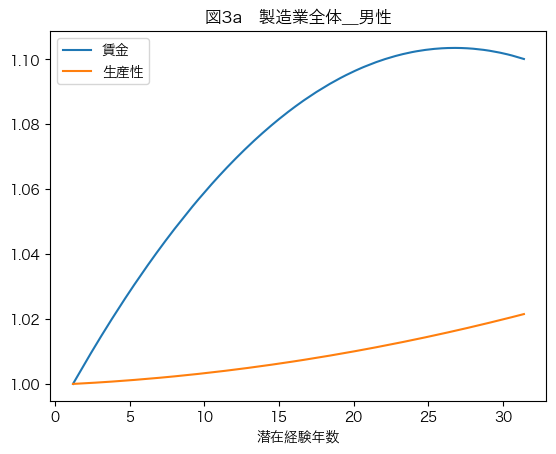

In [56]:
figure = plt.figure()
ax = plt.subplot(111)
plt.plot(x_hats,sal_lis,label = '賃金')
plt.plot(x_hats,pro_lis,label = '生産性') #y(n)/y(0)
plt.title('製造業全体＿男性')
plt.xlabel('潜在経験年数')

plt.title('図3a　製造業全体＿男性')
plt.legend()
figure.savefig('製造業全体＿男性.png')

In [57]:
hiseiki_male = male_data['hiseiki']


In [58]:
s_p = salary_hats*math.e-pro_hats*math.e*1000
s_p_log = salary_hats-pro_hats

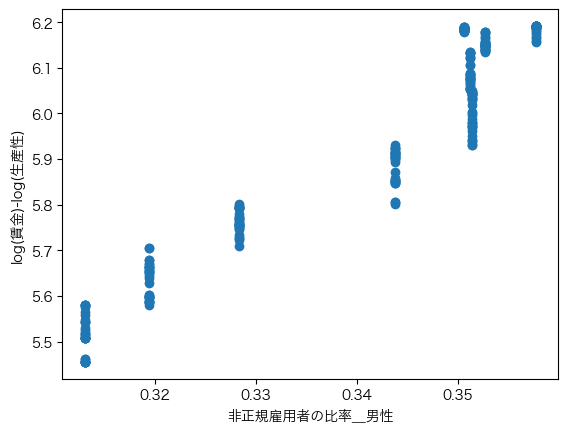

In [59]:
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(hiseiki_male,s_p_log)
plt.xlabel('非正規雇用者の比率＿男性')
plt.ylabel('log(賃金)-log(生産性)')

plt.savefig('非正規雇用者の比率＿男性_scatter_log')

# graph(female)

In [60]:
kinzoku_p_f = female_pro_res.params[1]
kinzoku_square_p_f = female_pro_res.params[2]
const_p_f = female_pro_res.params[0]


In [61]:
kinzoku_s_f = female_salary_res.params[1]
kinzoku_square_s_f = female_salary_res.params[2]
const_s_f = female_salary_res.params[0]

In [62]:
f_salary_f =lambda x: kinzoku_s_f * x + kinzoku_square_s_f * (x**2) + const_s_f
f_pro_f = lambda x : kinzoku_p_f * x +kinzoku_square_p_f * (x**2) + const_p_f


In [63]:
x_hats_f = female_data['勤続年数']
x_hats_f = np.sort(x_hats_f)

In [64]:
salary_hats_f = f_salary_f(np.array(x_hats_f))
pro_hats_f = f_pro_f(np.array(x_hats_f))


In [65]:
pro_lis_f = []
for ind in range(len(pro_hats_f)):
    res = pro_hats_f[ind]/pro_hats_f[0]
    pro_lis_f.append(res)
    

In [66]:
sal_lis_f = []
for ind in range(len(salary_hats_f)):
    res = salary_hats_f[ind]/salary_hats_f[0]
    sal_lis_f.append(res)


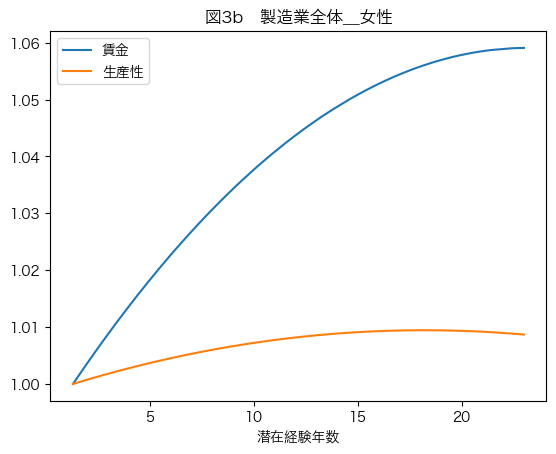

In [67]:
figure = plt.figure()
ax = plt.subplot(111)
plt.plot(x_hats_f,sal_lis_f,label = '賃金')
plt.plot(x_hats_f,pro_lis_f,label = '生産性') #y(n)/y(0)
plt.title('製造業全体＿女性')
plt.xlabel('潜在経験年数')

plt.legend()
plt.title('図3b　製造業全体＿女性')
figure.savefig('製造業全体＿女性.png')



In [68]:
hiseiki_female = female_data['hiseiki']
s_p_f = salary_hats_f - pro_hats_f

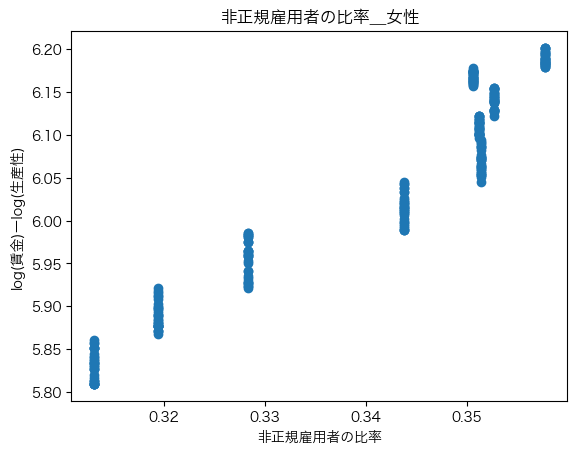

In [69]:
fig = plt.figure()
ax = plt.subplot(111)


plt.scatter(hiseiki_female,s_p_f)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('log(賃金)ーlog(生産性)')
plt.title('非正規雇用者の比率＿女性')
plt.savefig('非正規雇用者の比率＿女性_scatter')

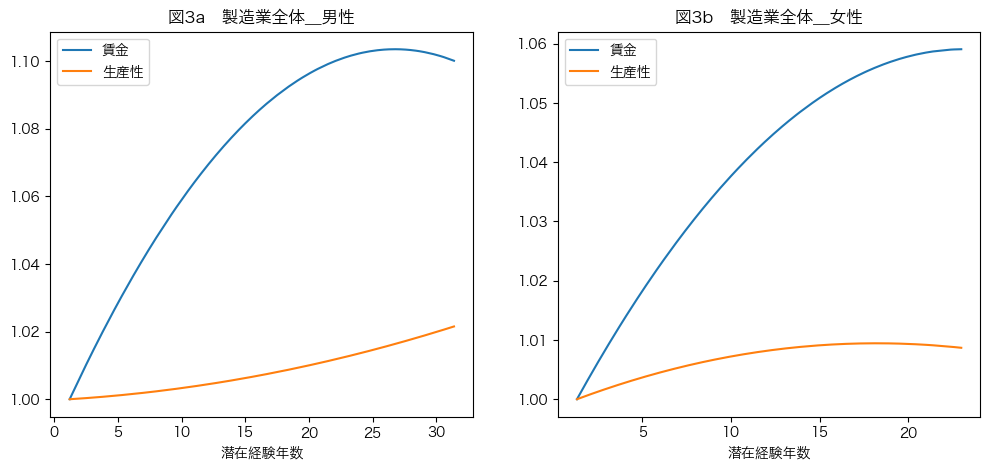

In [70]:
figure = plt.figure(figsize=(12,5))

ax1 = plt.subplot(121)
plt.plot(x_hats,sal_lis,label = '賃金')
plt.plot(x_hats,pro_lis,label = '生産性') #y(n)/y(0)
plt.title('製造業全体＿男性')
plt.xlabel('潜在経験年数')

plt.title('図3a　製造業全体＿男性')
plt.legend()

ax2 = plt.subplot(122)
plt.plot(x_hats_f,sal_lis_f,label = '賃金')
plt.plot(x_hats_f,pro_lis_f,label = '生産性') #y(n)/y(0)
plt.title('製造業全体＿女性')
plt.xlabel('潜在経験年数')

plt.legend()
plt.title('図3b　製造業全体＿女性')
plt.axis('auto')
plt.savefig('製造業全体.png')




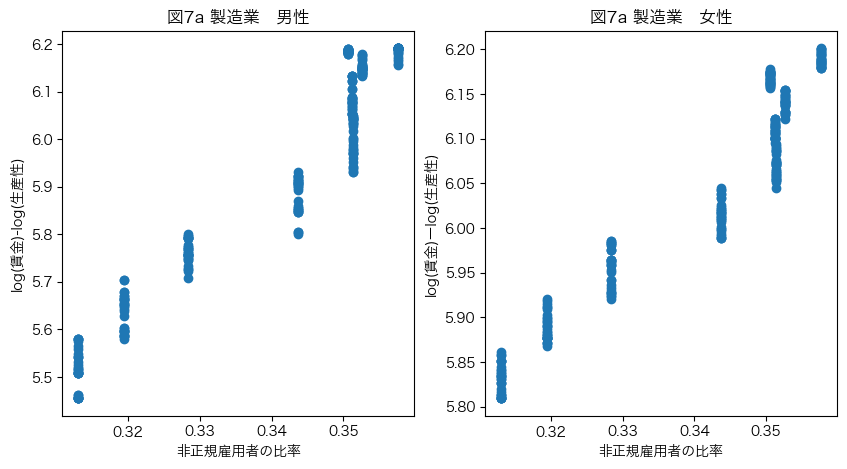

In [76]:
fig = plt.figure(figsize = (10,5))
ax = plt.subplot(121)
plt.scatter(hiseiki_male,s_p_log)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('log(賃金)-log(生産性)')
plt.title('図7a 製造業　男性')

ax2 = plt.subplot(122)
plt.scatter(hiseiki_female,s_p_f)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('log(賃金)ーlog(生産性)')
plt.title('図7a 製造業　女性')

plt.savefig('図７')